## k平均法(k-means clustering)とは
クラスタリングの最も簡単な手法の一つであり，教師なし学習です．
k近傍法は教師あり学習だったのでデータが果物か野菜かなどのラベルが既知でしたがk平均法においてはそのようなデータを前提としない学習です．
下記にアルゴリズムの簡単な流れを記載します。

硬い表現
1. 各点にランダムにクラスタを割り当てる
2. クラスタの重心を計算する。
3. 点のクラスタを、一番近い重心のクラスタに変更する
4. 変化がなければ終了。変化がある限りは 2. に戻る。

柔らかい表現
1. ランダムに点をばら撒き、適当に根拠なくグループ分けする。
2. 各グループの中心を求める。
3. さっきのグループ分けは適当だったので、一番近いグループの中心に基づいて再度グループ分けし直す。
4. 1~3を変化がなくなるまで繰り返す。

と、ただ文章で書いても理解が難しいので、下記に画像も付随して説明をしてきたいいと思います。  
ちなみに、ただのmarkdownで画像等を表示していってもつまらないので、今回はmatplotlibを使用して画像を表示していきます。

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [18]:
def image_show(file_path):
    img=mpimg.imread(file_path)
    plt.imshow(img)

今回は、データが大きく三つの塊に分散をしていると仮定します。  
ただ、まだこれらのデータには特にラベル等も振られておらず、二次元状にプロットしただけの段階です。  
教師なし学習の最初というのはこの様なデータセットを持っているところから始まります。

k-means法はこれらのデータをカテゴリ分けするアルゴリズムになります。

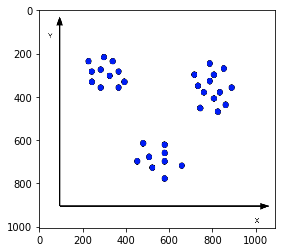

In [19]:
image_show("images/1.png")

では、まずはランダムに各データにラベルを振ってみましょう。  
今回は、三つに分けたいと考えているとします。  
ラベル付け後の状況はこんな感じです。

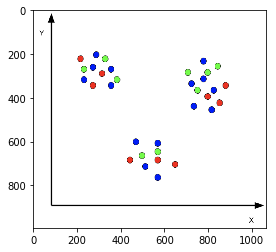

In [20]:
image_show("images/2.png")

完全にデタラメですね、ここからがアルゴリズムの見せ所です。  
クラスタの重心を計算します。  
下記の線が表しているのは、書くデータのあるべきカテゴリへの移動距離になります。  
これを求めることにより、書くデータ分散の重心を計算できます。

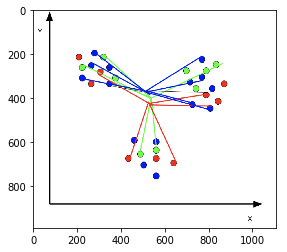

In [22]:
image_show("images/3.png")

そして、点のクラスタを、一番近い重心のクラスタに変更します。  
ただ、この時点では施行は1回目なので、完全にカテゴリ分けできるとは限りません。  
というかほぼできないと思ってください、、今回はサンプルとして、もともとデータの塊ができている様なケースを使用していますので。  

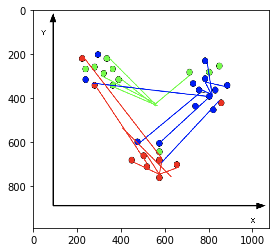

In [24]:
image_show("images/4.png")

あとは、上記のプロセスを繰り返して、うまく分離できるまで続けます。  
完了後は下記の様に綺麗にデータカテゴリ分けがされているのを確認できます。

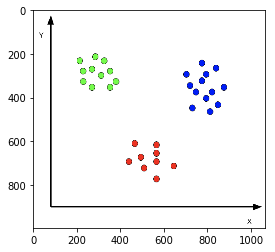

In [26]:
image_show("images/5.png")

## Use Case

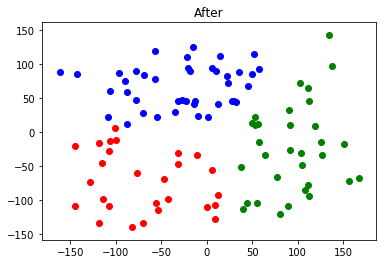

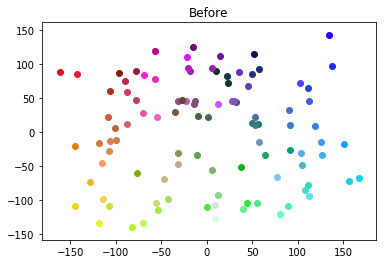

In [3]:
# libraries
from random import randint
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# データセットとして，RGB値を乱数で生成する
def create_data(num,CLUSTERS):
    data = np.empty((0,CLUSTERS), int)
    for i in range(num):
        red = randint(0,256)
        blue = randint(0,256)
        green = randint(0,256)

        data = np.append(data, np.array([[red,blue,green]]), axis=0)

    return data

# データセット準備の段階
# クラスタ数:3色
# データ数:100
num_data = 100
CLUSTERS = 3
color = ["red", "blue", "green"]
data = create_data(num_data,CLUSTERS)

# N_JOBS:CPUのコア数を示している
# model.labels_:各データのクラスタ番号をリストにしている
N_JOBS = 2
model = KMeans(n_clusters=CLUSTERS, n_jobs=N_JOBS).fit(data)

# 主成分分析によって3次元特徴を2次元に削減することができる
# 主成分分析については、今回の授業では扱いません。
# n_componentsで何次元に削減するかを指定することができる
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# クラスタリング結果のプロット
plt.figure()
for i in range(pca_data.shape[0]):
    plt.scatter(pca_data[i,0], pca_data[i,1], c=color[int(model.labels_[i])])
    plt.title("After")

# 生データのプロット
plt.figure()
for j in range(pca_data.shape[0]):
    color = tuple((round(data[j][0]/256, 3), round(data[j][1]/256, 3), round(data[j][2]/256, 3)))

    plt.scatter(pca_data[j,0], pca_data[j,1], c=color)
    plt.title("Before")

plt.show()


詳細な説明  
https://qiita.com/c_5/items/6428d9080cec66285e3d

こちらの方などは最初から全てアルゴリズムを組んだりしておりますね！  
https://qiita.com/tatsuya-miyamoto/items/018ea59f3746be81ca16

In [8]:
pca_data

array([[  57.82297128,   92.56197504],
       [   0.51529211, -110.26133708],
       [  44.67383414, -104.5720428 ],
       [   5.86449138,  -55.546742  ],
       [  53.70519365,   22.14327349],
       [ -54.27445299,   21.72527789],
       [ -21.91778035,  109.38836489],
       [ 104.88092783,  -47.95359476],
       [  36.04206893,   88.26827904],
       [  64.2305109 ,  -33.54749015],
       [-118.82397965,  -16.25293383],
       [ 111.2917304 ,  -77.3192676 ],
       [-100.6103886 ,    6.38105261],
       [ -34.71718048,   29.13962962],
       [ -96.54381929,   85.85302419],
       [  21.91864226,   82.11115508],
       [-106.06622132,  -13.75616329],
       [ 102.34481122,   71.43702719],
       [ 167.58286631,  -67.01325463],
       [ -56.771735  ,  118.56481326],
       [ -78.20202459,   47.44431497],
       [  89.56735894, -109.33373688],
       [  31.79732578,   43.85927764],
       [ -76.54443919,  -59.72720649],
       [  45.94352605,   67.39959261],
       [-108.97121553,   